<a href="https://colab.research.google.com/github/shawn-cavalieri/panic_at_the_desktop_final_project/blob/master/linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:

# install dependencies

import pandas as pd
import datetime
import numpy as np
import pandas_datareader.data as web
import matplotlib.pyplot as plt
from pandas import Series, DataFrame
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [0]:
# get stock data from yahoo finance

stock = input("Enter a Stock Ticker")
start = datetime.datetime(2018, 1, 1)
end = datetime.datetime(2020, 5, 1)

df = web.DataReader(stock, 'yahoo', start, end)

df.head()

Enter a Stock TickerAAPL


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-01-02,172.300003,169.259995,170.160004,172.259995,25555900.0,166.804016
2018-01-03,174.550003,171.960007,172.529999,172.229996,29517900.0,166.774963
2018-01-04,173.470001,172.080002,172.539993,173.029999,22434600.0,167.549622
2018-01-05,175.369995,173.050003,173.440002,175.000000,23660000.0,169.457214
2018-01-08,175.610001,173.929993,174.350006,174.350006,20567800.0,168.827820


In [0]:
# show adjusted close price 

df = df[['Adj Close']]

df.head()

,Adj Close
Date,
2018-01-02,166.804016
2018-01-03,166.774963
2018-01-04,167.549622
2018-01-05,169.457214
2018-01-08,168.827820


In [0]:
# create variable for predicting 'n' days into the future (set example to 10)

forecast_out = 10

# create another column shifted 'n' units up

df['Prediction'] = df[['Adj Close']].shift(-forecast_out)

df.tail(10)

,Adj Close,Prediction
Date,,
2020-04-20,276.929993,NaN
2020-04-21,268.369995,NaN
2020-04-22,276.100006,NaN
2020-04-23,275.029999,NaN
2020-04-24,282.970001,NaN
2020-04-27,283.170013,NaN
2020-04-28,278.579987,NaN
2020-04-29,287.730011,NaN
2020-04-30,293.799988,NaN


In [0]:
## create the independent data set (x)

# convert dataframe to a numpy array

X = np.array(df.drop(['Prediction'],1))

# remove the last 'n' rows

X = X[:-forecast_out]

print(X)

[[166.80401611]
 [166.77496338]
 [167.54962158]
 [169.45721436]
 [168.82781982]
 [168.80845642]
 [168.76971436]
 [169.7283783 ]
 [171.48106384]
 [170.60955811]
 [173.42739868]
 [173.58232117]
 [172.80766296]
 [171.3939209 ]
 [171.43263245]
 [168.70195007]
 [165.69044495]
 [166.07775879]
 [162.64021301]
 [161.68157959]
 [162.12701416]
 [162.46591187]
 [155.41651917]
 [151.5335083 ]
 [157.86633301]
 [154.48687744]
 [150.23594666]
 [152.07354736]
 [158.19888306]
 [159.78367615]
 [162.72967529]
 [168.19387817]
 [167.6493988 ]
 [167.08547974]
 [166.32710266]
 [167.717453  ]
 [170.63427734]
 [174.00805664]
 [173.44416809]
 [173.18165588]
 [170.14811707]
 [171.32460022]
 [171.91770935]
 [171.77185059]
 [170.17732239]
 [172.03436279]
 [174.99005127]
 [176.68182373]
 [174.98034668]
 [173.49275208]
 [173.69692993]
 [173.08442688]
 [170.43983459]
 [170.38150024]
 [166.52156067]
 [164.1686554 ]
 [160.36703491]
 [167.97999573]
 [163.67277527]
 [161.86436462]
 [163.12831116]
 [162.05880737]
 [163.72

In [0]:
### create the dependent data set (y) ###

# convert the dataframe to a numpy array

y = np.array(df['Prediction'])

# get all of the y values except the last 'n' rows

y = y[:-forecast_out]

print(y)

[173.42739868 173.58232117 172.80766296 171.3939209  171.43263245
 168.70195007 165.69044495 166.07775879 162.64021301 161.68157959
 162.12701416 162.46591187 155.41651917 151.5335083  157.86633301
 154.48687744 150.23594666 152.07354736 158.19888306 159.78367615
 162.72967529 168.19387817 167.6493988  167.08547974 166.32710266
 167.717453   170.63427734 174.00805664 173.44416809 173.18165588
 170.14811707 171.32460022 171.91770935 171.77185059 170.17732239
 172.03436279 174.99005127 176.68182373 174.98034668 173.49275208
 173.69692993 173.08442688 170.43983459 170.38150024 166.52156067
 164.1686554  160.36703491 167.97999573 163.67277527 161.86436462
 163.12831116 162.05880737 163.72142029 166.85214233 168.00912476
 163.71170044 165.33538818 168.44667053 167.65911865 169.31199646
 169.88560486 170.94541931 173.29830933 172.90939331 168.00912476
 161.12541199 160.65875244 158.42251587 159.11280823 159.66700745
 157.81968689 160.67817688 164.41169739 171.67462158 171.98573303
 178.73332

In [0]:
# split the data into 80% training and 20% testing

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [0]:
# create and train the Linear Regression Model

lr = LinearRegression()

# train the model

lr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
# testing model: Score returns the coefficient of determination R^2 of the prediction
# the best possible score is 1.0

lr_confidence = lr.score(x_test, y_test)

print("lr confidence: ", lr_confidence)

lr confidence:  0.9003297442098697


In [0]:
# set x_forecast equal to the last x rows of the original data set from Adj Close column

x_forecast = np.array(df.drop(['Prediction'],1))[-forecast_out:]

print(x_forecast)

[[276.92999268]
 [268.36999512]
 [276.1000061 ]
 [275.02999878]
 [282.97000122]
 [283.17001343]
 [278.57998657]
 [287.73001099]
 [293.79998779]
 [289.07000732]]


In [0]:
# print the linear regression model predictions for the next 'n' days

lr_prediction = lr.predict(x_forecast)

print(lr_prediction)


[277.34468851 268.96456254 276.53214248 275.48461927 283.2577781
 283.45358744 278.96001102 287.91776558 293.86019371 289.22960452]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


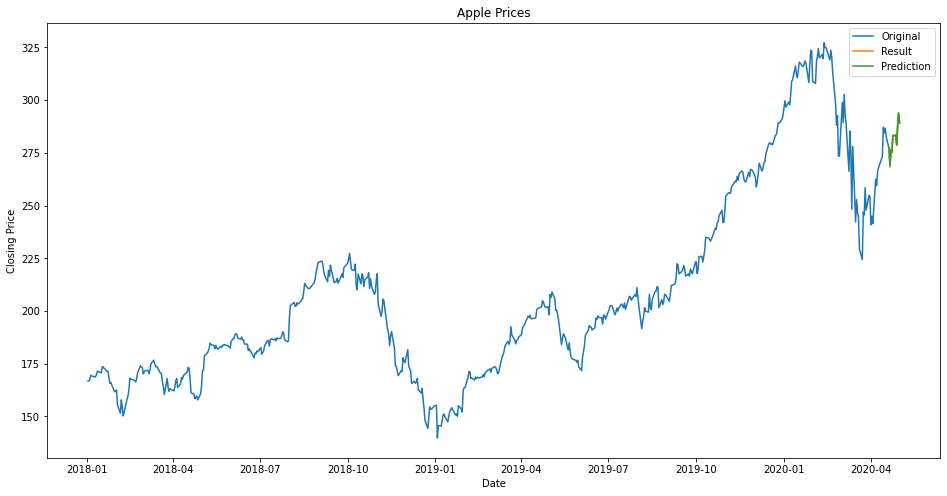

In [0]:
# visualize the data

predictions = lr_prediction

result = df[X.shape[0]:]
result['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Apple Prices')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.plot(df['Adj Close'])
plt.plot(result[['Adj Close', 'Predictions']])
plt.legend(['Original', 'Result', 'Prediction'])
plt.show()